<a href="https://colab.research.google.com/github/Myth524/Clustering/blob/main/CasoAgrupamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Caso Agrupamiento #1**

> Computación Científica



#*Integrantes:*
- Miguel Wagner Osorio
- Miguel Gaviria Escobar
- Simón Londoño Londoño

# **Enunciado**

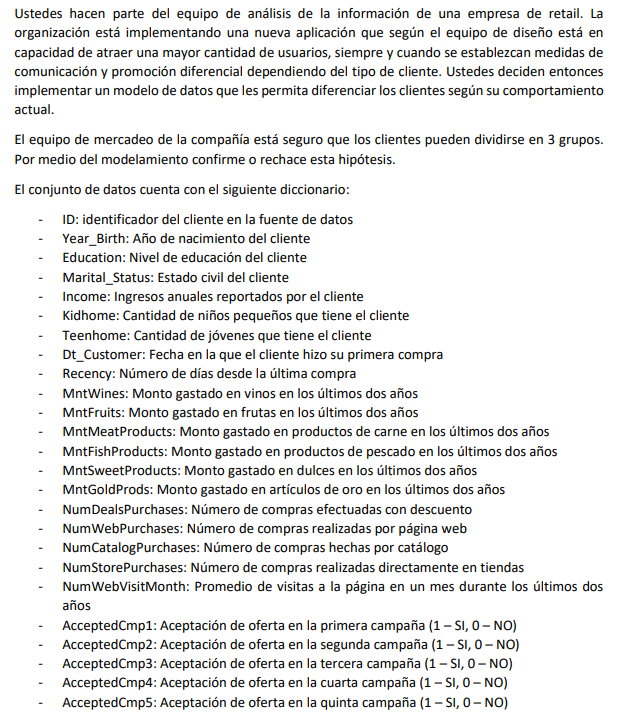
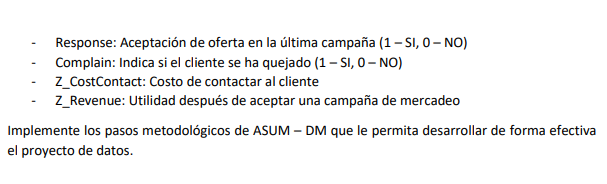

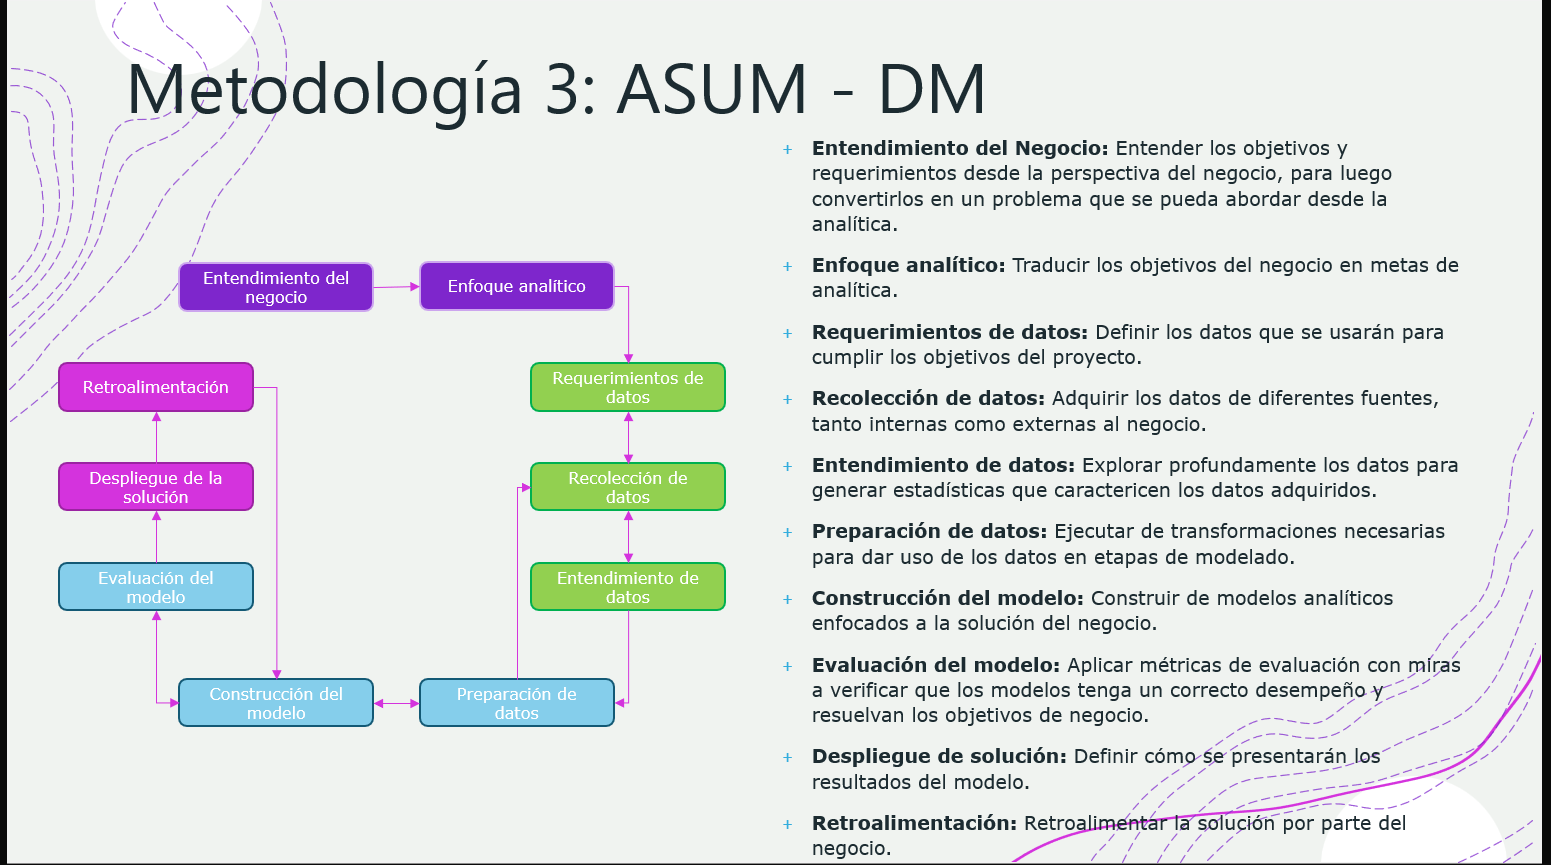

#**1. Librerias**

In [ ]:
# Tratamiento de datos
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.datasets import make_blobs

#Modelado y preprocesamiento
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from itertools import product

# Librerias de datos
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline

# Graficos
import matplotlib.pyplot as plt
import seaborn as sb

# Reduccion de la dimensionalidad
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, scale

# Advertencias
import warnings
warnings.filterwarnings('ignore')

#**2. Conjunto de datos**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/CC/datos_caso_1.csv', delimiter=';')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


##**2.1. Visualizacion de la proporcion de datos nulos**

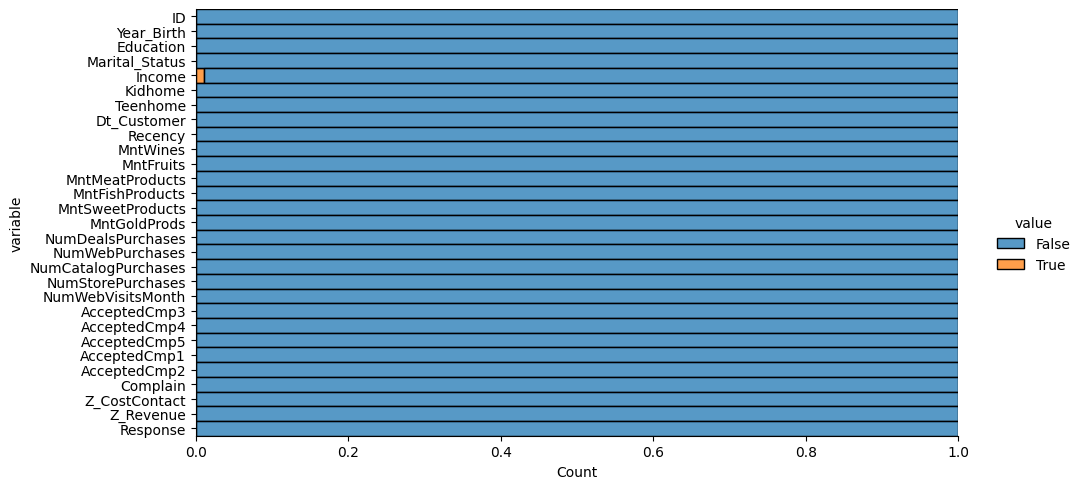

In [ ]:
data.isnull().melt().pipe(lambda df: sb.displot(data = df, y = 'variable', hue = 'value', multiple = 'fill', aspect = 2))
plt.show()

##**2.1.1 Completitud de datos nulos**

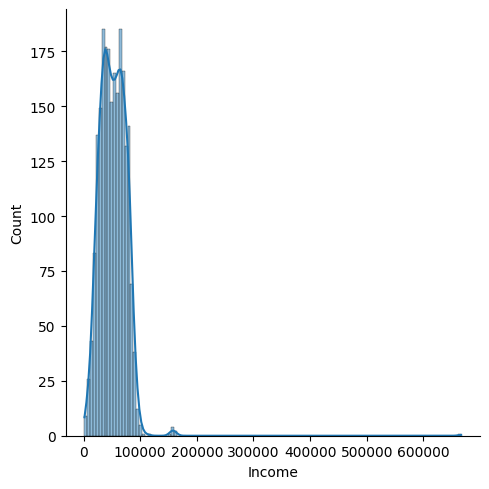

In [ ]:
# Distribucion de la column Income
sb.displot(data = data, x = 'Income', kde = True)
plt.show()

### Se usa imputacion por media

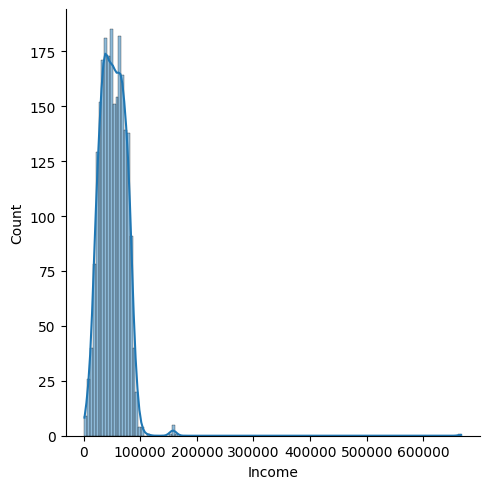

In [ ]:
data_original = data.copy()
data['Income'] = data['Income'].fillna(data['Income'].median())

# Distribucion despues del cambio
sb.displot(data = data, x = 'Income', kde = True)
plt.show()

##**2.2. Grafico de variables numericas**

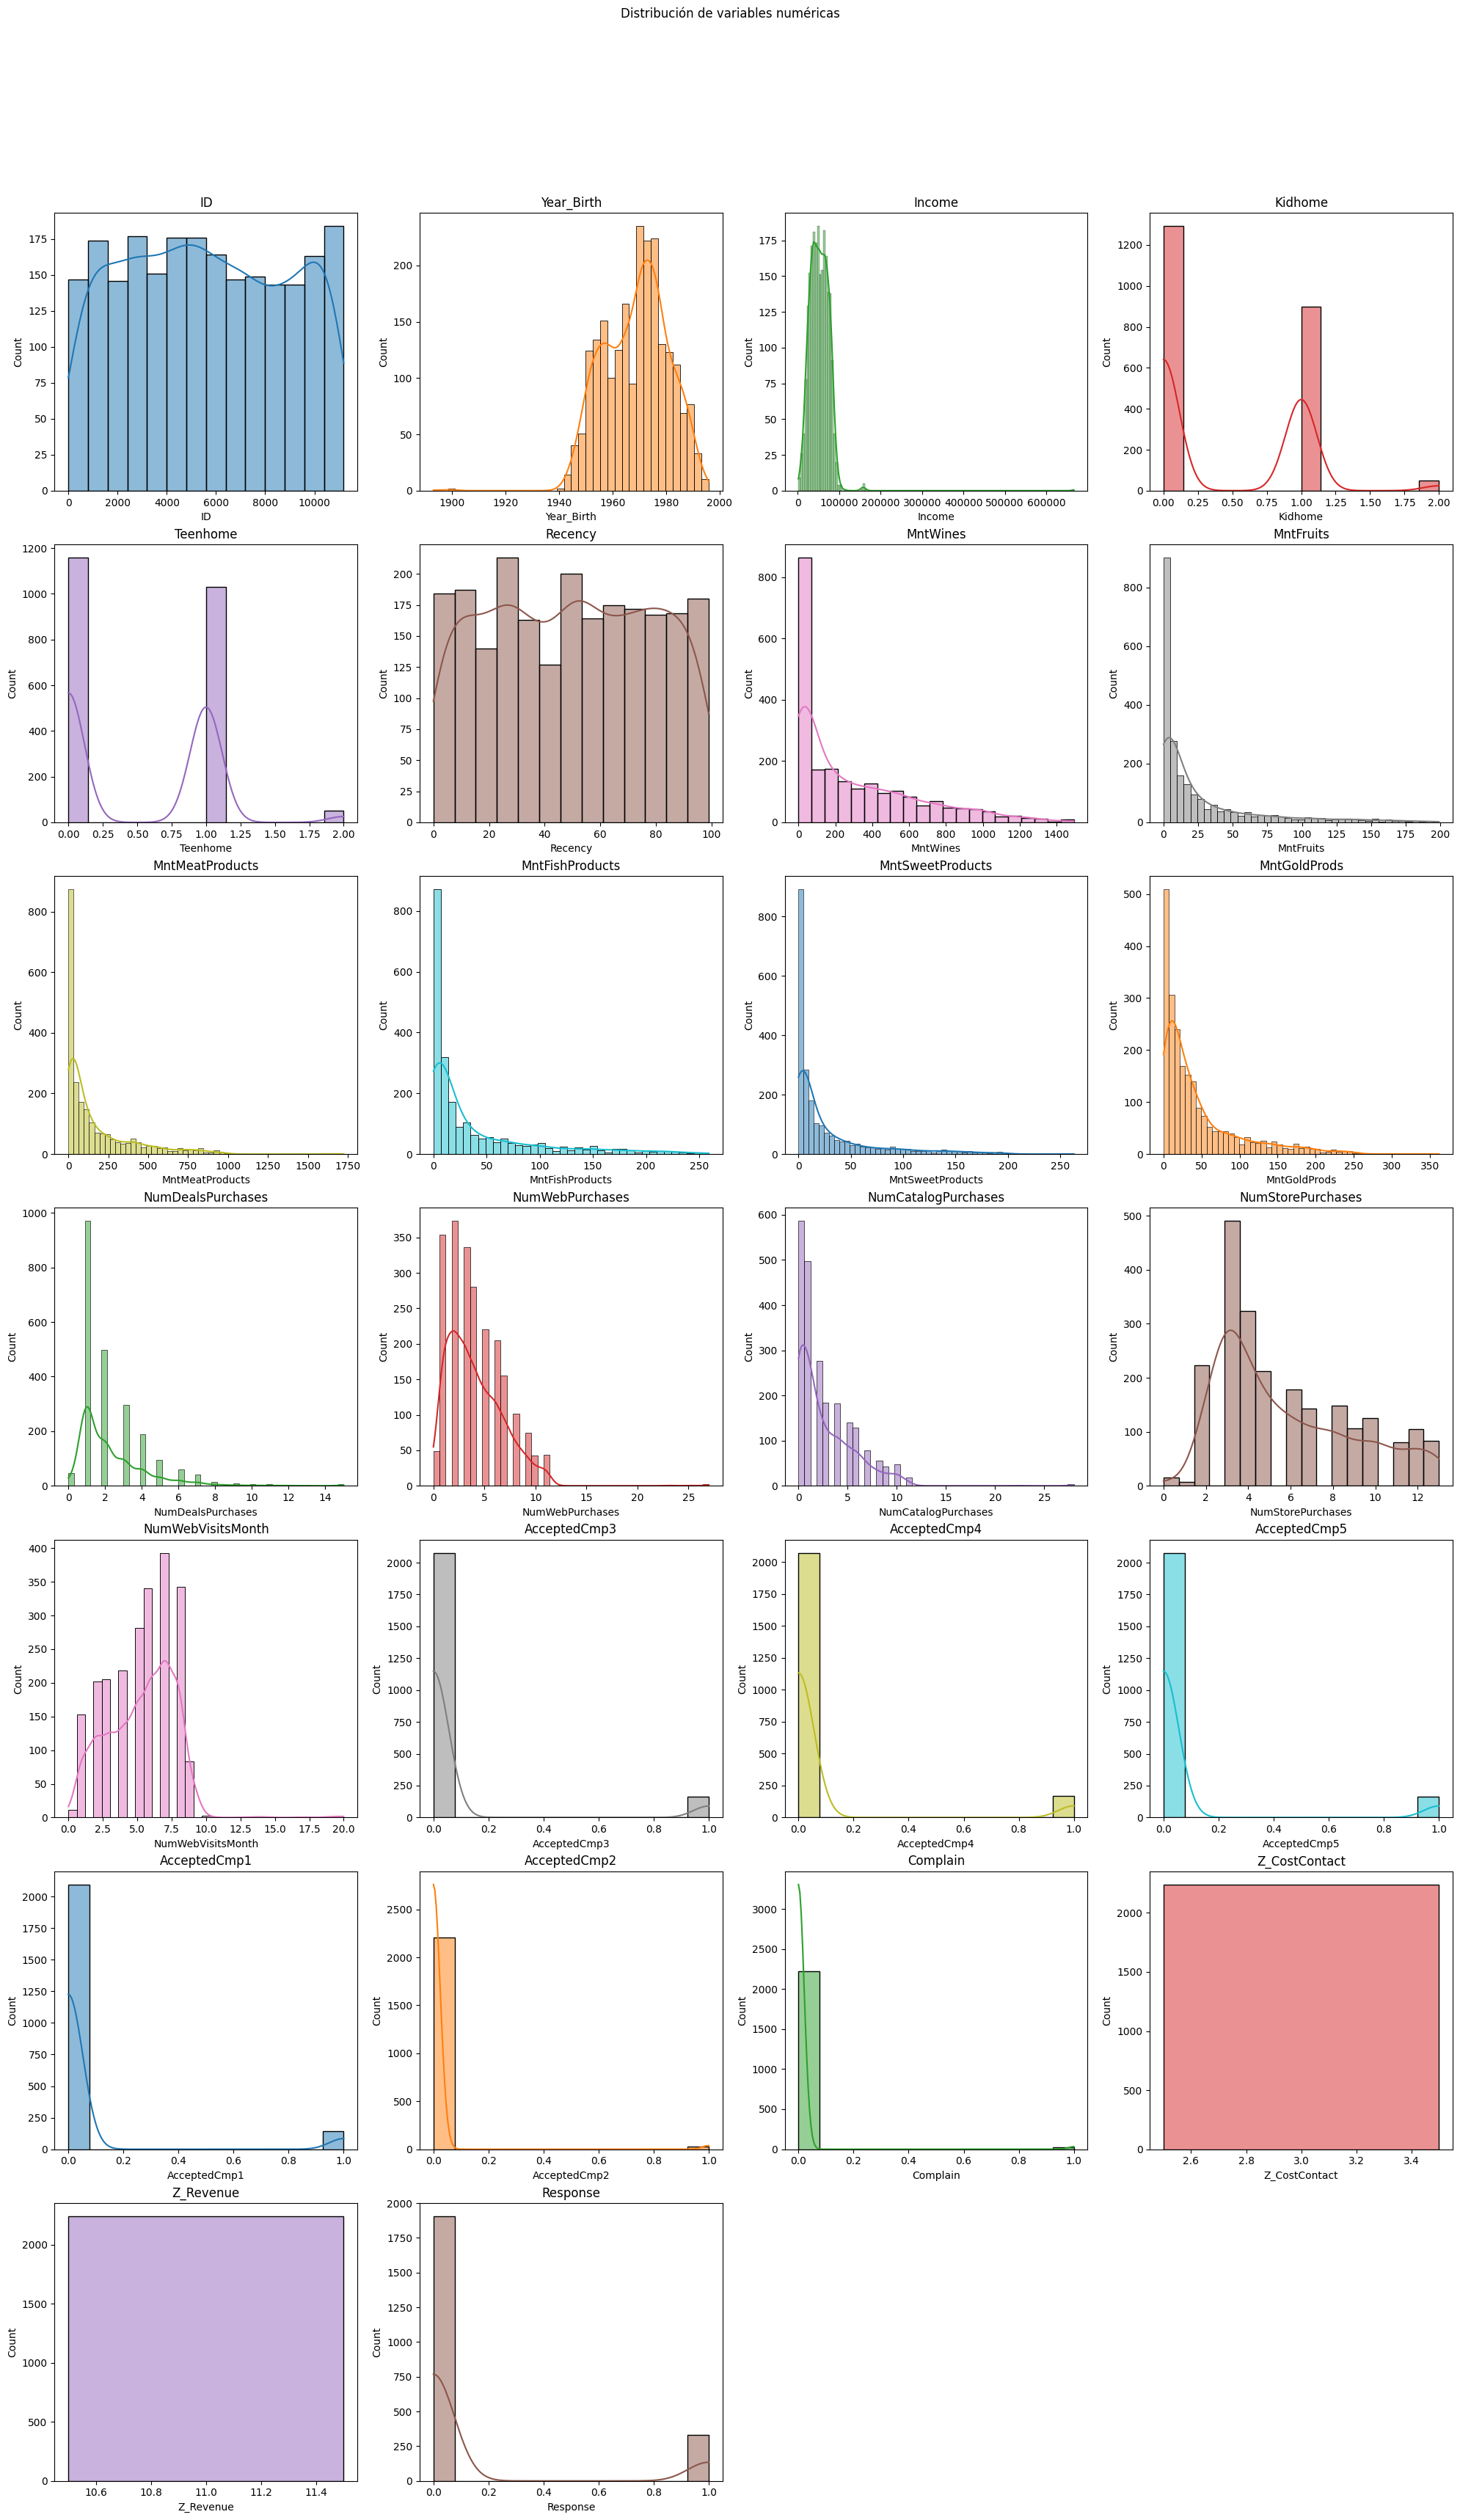

In [ ]:
# Seleccionar las columnas numéricas
num_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Determinar el número de columnas y filas necesarias
n_cols = 4
n_rows = (len(num_cols) + n_cols - 1) // n_cols

# Crear la figura y los ejes
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
ax = ax.flat

# Crear los histogramas
for i, col in enumerate(num_cols):
    sb.histplot(data=data, x=col, kde=True, color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i % 10], ax=ax[i])
    ax[i].set_title(col)

# Eliminar los subplots vacíos si sobran
for i in range(len(num_cols), len(ax)):
    fig.delaxes(ax[i])

# Ajustar el layout y mostrar la figura
fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle('Distribución de variables numéricas')
plt.show()

##**2.3. Grafico de variables categoricas**

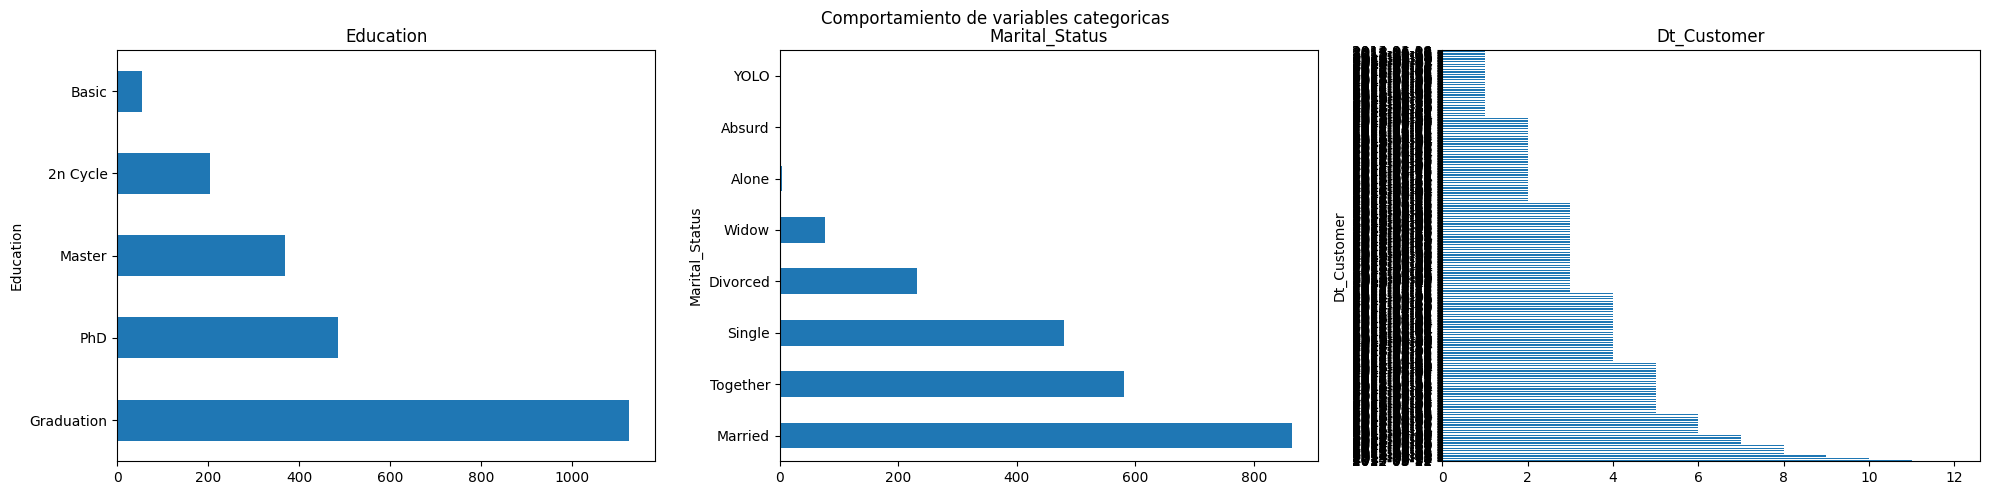

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
ax = ax.flat
cat_col = data.select_dtypes(include = ['object']).columns
for i, col in enumerate(cat_col):
  data[col].value_counts().plot.barh(ax = ax[i])
  ax[i].set_title(col)

fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle('Comportamiento de variables categoricas')
plt.show()

##**2.4. Grafico de correlacion de Pearson**

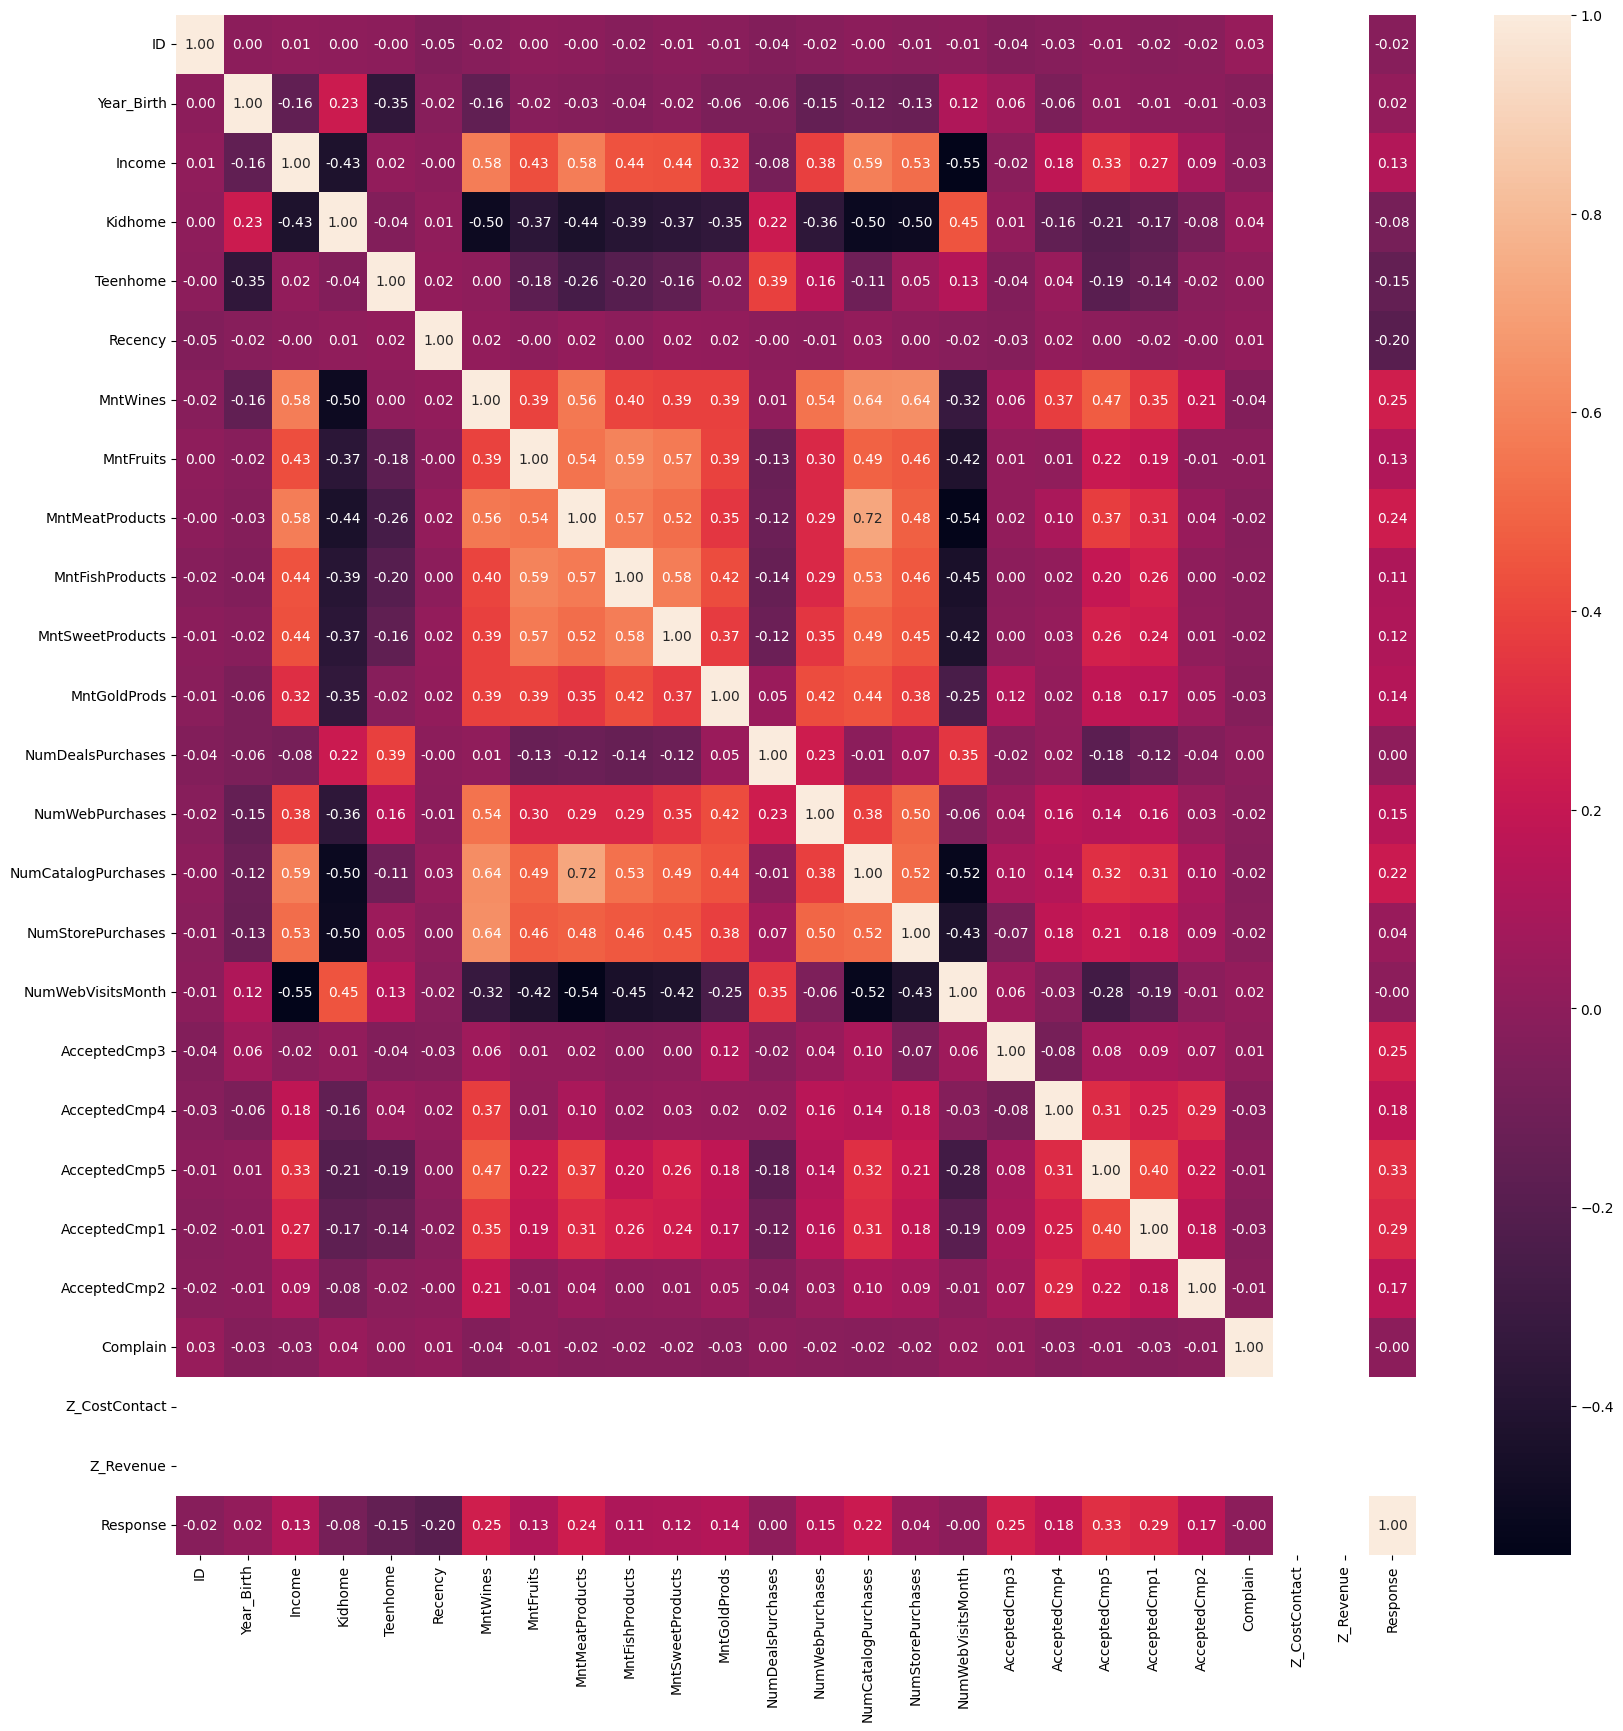

In [ ]:
plt.figure(figsize = (20,20))
sb.heatmap(data = data.corr(numeric_only = True), annot = True, fmt = '.2f')
plt.show()

#**3. Preparacion de los datos**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## **3.1. Eliminacion columnas basura**

In [ ]:
data = data.drop(columns=['ID', "AcceptedCmp3", "AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2","Z_Revenue","Z_CostContact","Response","Complain"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

## **3.1.1. Formateo de la columna Dt_Customer**

In [ ]:
# Convertir Dt_Customer a datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

# Extraer año, mes y día
data['Year'] = data['Dt_Customer'].dt.year
data['Month'] = data['Dt_Customer'].dt.month
data['Day'] = data['Dt_Customer'].dt.day

# Eliminar la columna original Dt_Customer
data = data.drop(columns=['Dt_Customer'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

In [ ]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Year,Month,Day
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,88,88,3,8,10,4,7,2012,9,4
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,1,6,2,1,1,2,5,2014,3,8
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,21,42,1,8,2,10,4,2013,8,21
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,3,5,2,2,0,4,6,2014,2,10
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,27,15,5,5,3,6,5,2014,1,19


## **3.3. Transformacion de variables numericas y categoricas**

In [ ]:
# Importar OneHot encoder
from sklearn.preprocessing import OneHotEncoder

# Identificacion de las variables por tipo de dato
num_cols = data.select_dtypes(include=['float64', 'int64',"int32"]).columns
cat_cols = data.select_dtypes(include=['object']).columns

# Definir los tranformadores de columnas por tipo de dato
num_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

cat_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder())
])

# Design el transofrmador de las columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)],
        remainder='passthrough'
    )
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Year',
       'Month', 'Day'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 Index(['Education', 'Marital_Status'], dtype='object'))])

In [ ]:
data_pre = preprocessor.fit_transform(data)
cod_cat = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_cols)
labels = np.concatenate([num_cols, cod_cat])
data_pro = pd.DataFrame(data_pre, columns = labels)
data_pro.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.621359,0.084832,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.334601,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.592233,0.067095,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,0.003802,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.699029,0.105097,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,0.079848,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.883495,0.037471,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.011407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.854369,0.085065,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.102662,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#**4. Modelado**

## **4.1. KMeans**

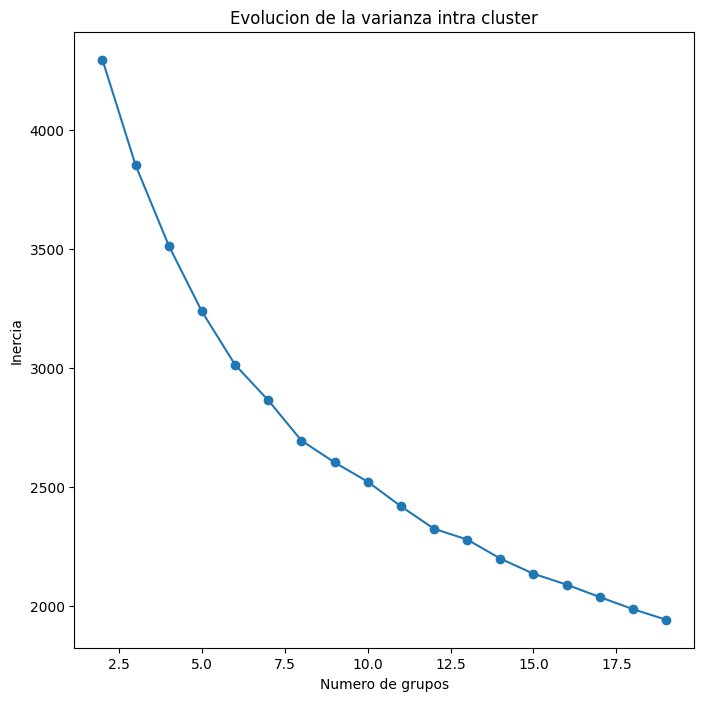

In [ ]:
range_n_cluster = range(2, 20)
inertias = []

for n_clusters in range_n_cluster:
  kmeans_model = KMeans(n_clusters = n_clusters,
                        n_init = 20,
                        random_state = 25)
  kmeans_model.fit(data_pro)
  inertias.append(kmeans_model.inertia_)

plt.figure(figsize = (8, 8))
plt.plot(range_n_cluster, inertias, marker = 'o')
plt.title('Evolucion de la varianza intra cluster')
plt.xlabel('Numero de grupos')
plt.ylabel('Inercia')
plt.show()

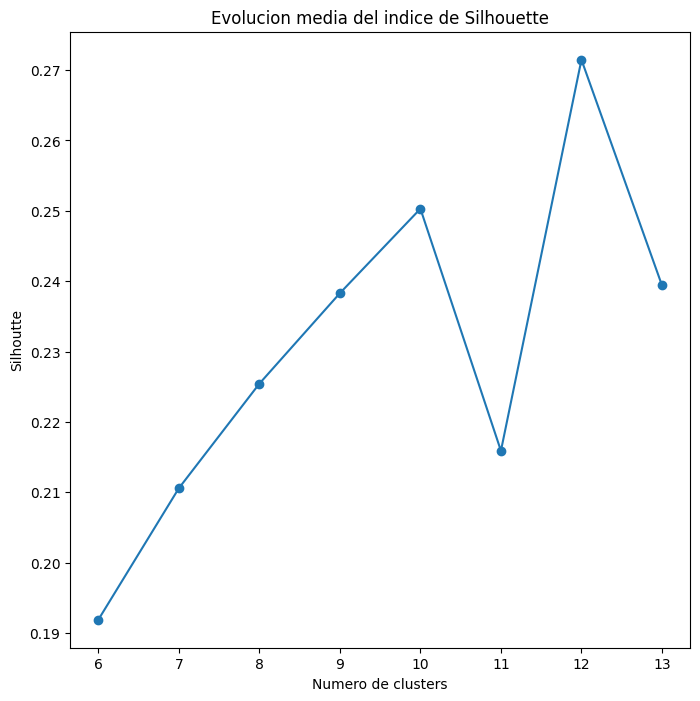

In [ ]:
range_n_cluster = range(6, 14)
sil_score = []

for n_clusters in range_n_cluster:
  kmeans_model = KMeans(n_clusters = n_clusters,
                        n_init = 20,
                        random_state = 123)
  kmeans_model.fit(data_pro)
  cluster_labels = kmeans_model.fit_predict(data_pro)
  sil_avg = silhouette_score(data_pro, cluster_labels)
  sil_score.append(sil_avg)

plt.figure(figsize = (8, 8))
plt.plot(range_n_cluster, sil_score, marker = 'o')
plt.title('Evolucion media del indice de Silhouette')
plt.xlabel('Numero de clusters')
plt.ylabel('Silhoutte')
plt.show()

In [ ]:
kmeans_model = KMeans(n_clusters = 12,
                      n_init = 20,
                      random_state = 123)
kmeans_model.fit(data_pro)

KMeans(n_clusters=12, n_init=20, random_state=123)

## **4.2. Aglomerativo Jerarquico**

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

#Funcion para dibujar dendrograma
def dibujar_dendrograma(model, **kwargs):
    counts  = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

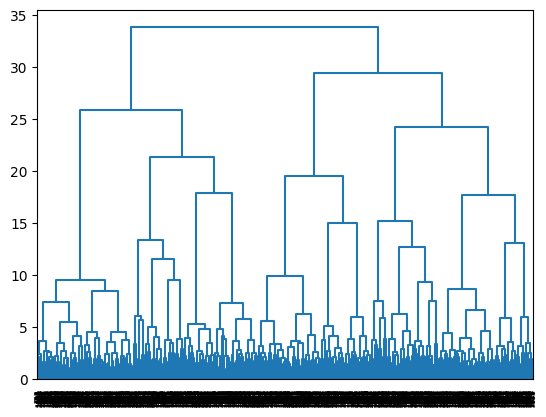

In [ ]:
hclust_complete = AgglomerativeClustering(metric = 'euclidean',
                                          linkage = 'ward',
                                          distance_threshold = 0,
                                          n_clusters = None)
hclust_complete.fit(data_pro)
dibujar_dendrograma(hclust_complete, color_threshold = 0)

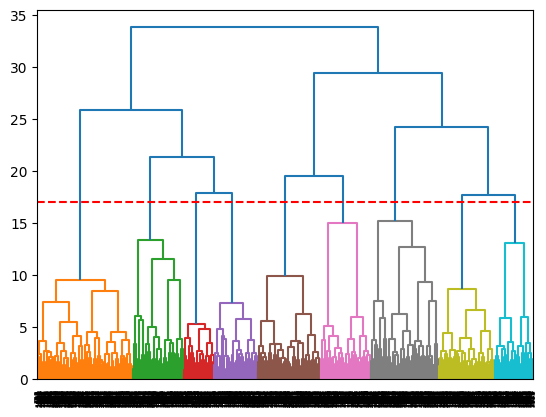

In [ ]:
dendrogram_prun = 17
dibujar_dendrograma(hclust_complete, color_threshold = dendrogram_prun)
plt.axhline(y = dendrogram_prun, color = 'r', linestyle = '--')
plt.show()

In [ ]:
hclust_complete = AgglomerativeClustering(n_clusters = 9, metric = 'euclidean', linkage = 'ward')
hclust_complete.fit_predict(data_pro)

array([8, 8, 6, ..., 0, 2, 4])

## **4.2. DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from itertools import product

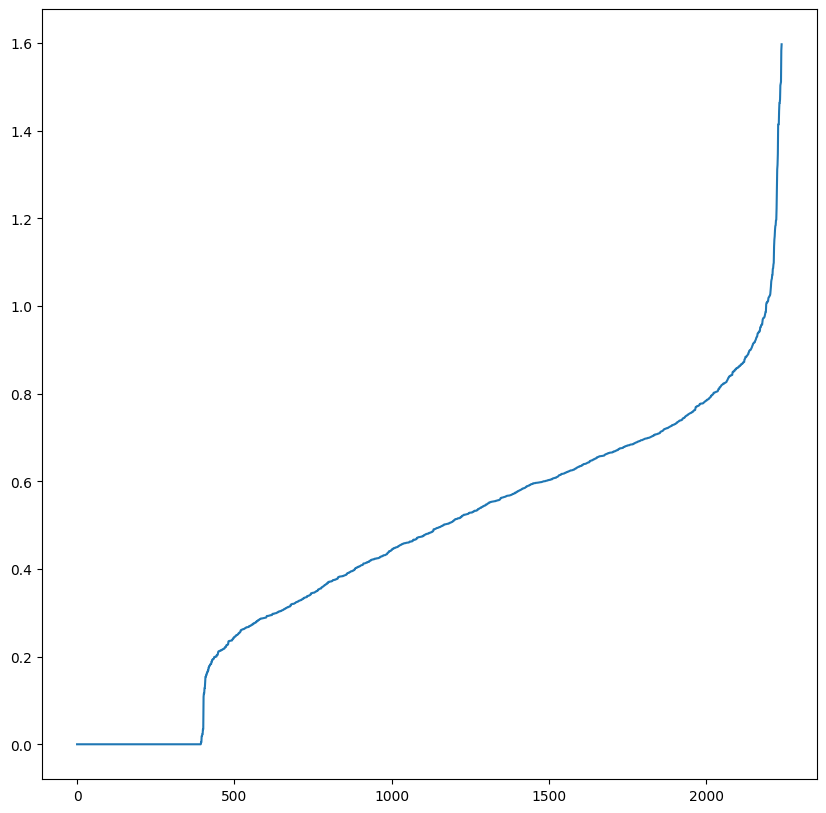

In [ ]:
# Identificar el rango de existencia de epsilon
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(data_pro)
distance, index = neighbors_fit.kneighbors(data_pro)
distance = np.sort(distance, axis = 0)
distance = distance[:, 1]
plt.figure(figsize=(10, 10))
plt.plot(distance)
plt.show()

In [ ]:
eps_value = np.arange(0.8, 1.6, 0.1)
min_samples = np.arange(2, 10)
dbscan_params = list(product(eps_value, min_samples))
sil_score = []
for p in dbscan_params:
  label = DBSCAN(eps = p[0], min_samples = p[1]).fit_predict(data_pro)
  sil_score.append(silhouette_score(data_pro, label))

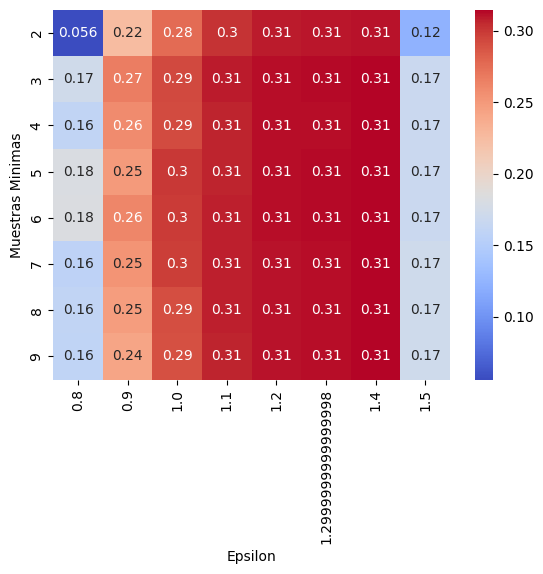

In [ ]:
dbscan_params_adj = pd.DataFrame.from_records(dbscan_params, columns = ['Epsilon', 'Muestras Minimas'])
dbscan_params_adj['Score'] = sil_score
pivot_data = pd.pivot_table(dbscan_params_adj, values = 'Score', index = 'Muestras Minimas', columns = 'Epsilon')
sb.heatmap(pivot_data, annot = True, fmt = '.2g', cmap = 'coolwarm')
plt.show()

In [ ]:
dbscan_model = DBSCAN(eps = 1.2, min_samples = 2)
dbscan_model.fit_predict(data_pro)

#Numero de clusters
np.unique(dbscan_model.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23])

# **5. Evaluacion**

In [ ]:
label_kmeans = kmeans_model.fit_predict(data_pro)
label_hclust = hclust_complete.fit_predict(data_pro)
label_dbscan = dbscan_model.fit_predict(data_pro)

In [ ]:
sil_kmeans = silhouette_score(data_pro, label_kmeans)
sil_agg = silhouette_score(data_pro, label_hclust)
sil_dbscan = silhouette_score(data_pro, label_dbscan)

print(f'El indice de Silhouette de KMeans es {sil_kmeans}\nEl indice de Silhouette de Aglomerativo es {sil_agg}\nEl indice de DBSCAN es {sil_dbscan}')

El indice de Silhouette de KMeans es 0.2714759218748468
El indice de Silhouette de Aglomerativo es 0.22740833500732083
El indice de DBSCAN es 0.30866553300039856


In [ ]:
np.unique(label_hclust)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
data_groups = data_pro.copy()
data_groups['KMeans'] = label_kmeans
data_groups['Agglomerativo'] = label_hclust
data_groups['DBSCAN'] = label_dbscan

In [ ]:
data_groups.Agglomerativo.value_counts()

,count
Agglomerativo,
3,432
0,308
6,286
8,253
5,229
2,225
4,196
1,173
7,138


In [ ]:
data_groups.KMeans.value_counts()

,count
KMeans,
2,433
6,300
0,252
10,192
7,177
9,158
11,157
8,138
3,122


In [ ]:
data_groups.DBSCAN.value_counts()

,count
DBSCAN,
6,432
1,285
0,251
2,190
10,138
4,119
5,117
3,106
9,97


# **Análisis de Resultados**

En el contexto del problema de segmentar un grupo de clientes en 24 segmentos, se observa que no es ideal agrupar a 17 individuos en un solo grupo. En cambio, es preferible optar por 11 grupos, que es una solución más manejable. Aunque el método DBSCAN presenta el mejor índice de Silhouette, el método aglomerativo, que resulta ser el segundo mejor, ofrece 11 grupos, lo cual es más adecuado para el contexto de retail.